# Wissenschaftliches Python Tutorial
Nachdem wir uns im Python Tutorial um die Grundlagen gekümmert haben, wollen wir uns nun mit einigen Bibliotheken beschäftigen, die das wissenschaftliche Arbeiten erleichtern. Diese sind

 * [Numpy](http://www.numpy.org/) für effiziente Berechnungen auf strukturierten Daten
 * [Matplotlib](http://matplotlib.org/) bietet eine einfache Möglichkeit Daten schön darzustellen
 * [Scipy](http://www.scipy.org/) enthält mathematische Funktionen und Algorithmen für statistische Berechnungen, Fits, etc.
 
Zunächst laden wir die Bibliotheken. Sollte dabei ein Fehler auftreten, stell bitte sicher, dass bei der Installation alles geklappt hat und du kein Paket vergessen hast. Die erste Zeile mit dem `%`-Zeichen ist sogenannte "Magie", die dafür sorgt, dass Plots im Notebook dargestellt werden.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Numpy: Arrays und effiziente Berechnungen
Das Herzstück von Numpy ist das _Array_. Dieser Datentyp repräsentiert eine Matrix und ist unter der Haube in C implementiert. Dabei wird großer Wert auf effiziente Speichernutzung gelegt. Der gängige Satz "Python ist viel zu langsam" ist also nicht zwingend wahr. Wir können Arrays auf verschiedene Arten erzeugen.

In [2]:
xs = np.array([1, 2, 3, 4])  # Konvertiert eine Python-Liste in ein Numpy-Array
print(xs)
ys = np.arange(4)  # Erzeugt ein Array analog zur `range` Funktion
print(ys)

[1 2 3 4]
[0 1 2 3]


Numpy Arrays unterstützen arithmetische Operationen, die wiederum effizient implementiert sind. Beispielsweise lassen sich zwei Arrays (elementweise) addieren sofern sie die gleichen Dimensionen haben.

In [3]:
xs + ys

array([1, 3, 5, 7])

Um einen Überblick über alle Features von Numpy zu bekommen, können wir die Hilfe zu Rate ziehen. Zusätzlich zur `help` Funktion bietet IPython auch die `?`-Magie mit einer besseren Integration in Jupyter

In [4]:
np?

Für die Übungsaufgaben werden wir häufig Zufallszahlen brauchen. Dafür bietet sich die Verwendung von `np.random` an.

In [5]:
np.random?

In [6]:
gauss = np.random.normal(2, 3, size=10000)  # Erzeuge 10000 Gauß-verteilte Zufallszahlen
                                            # mit µ=2 und σ=3.

## Matplotlib: _Schöne_ Plots
Matplotlib bietet sehr intuitive Funktionen um Daten darzustellen. Die [sehr ausführliche Dokumentation](http://matplotlib.org/api/pyplot_api.html#module-matplotlib.pyplot) bietet einen guten Überblick. Wir benutzen an dieser Stelle nur das `pyplot` Submodul, das uns ein einfaches Interface für die Kernfunktionalität bietet. In der [Matplotlib Galerie](http://matplotlib.org/gallery.html) finden sich viele schöne Beispiele mit Codeschnipseln.

Um unsere Gauß-verteilten Zufallszahlen zu histogrammieren benutzen wir einfach `plt.hist`. Außerdem setzen wir gleich Achsenbeschriftungen.

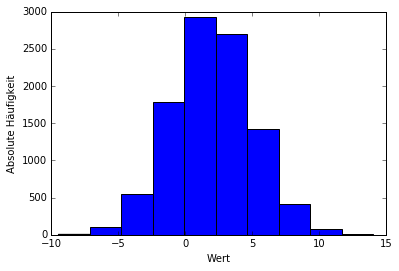

In [7]:
plt.hist(gauss)
plt.xlabel('Wert')
plt.ylabel('Absolute Häufigkeit')

Falls dir dieser Plot zu steril ist, können wir den Stil der bekannten R-Bibliothek `ggplot2` verwenden.

In [8]:
import matplotlib
matplotlib.style.use('ggplot')

Wir wollen nun die Anzahl Bins erhöhen und zusätzlich das Histogram normieren, damit wir die normierte Verteilungsfunktion (PDF) eintragen können.

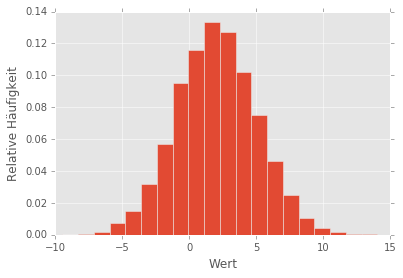

In [9]:
plt.hist(gauss, bins=20, normed=True)
plt.xlabel('Wert')
plt.ylabel('Relative Häufigkeit')

## Scipy: Statistische Funktionen und mehr
Die PDF erhalten wir ebenfalls aus Scipy. Um sie plotten zu können, müssen wir sie auf eine Reihe von Werten anwenden um Datenpunkte zu erhalten. Hier zeigt sich erneut die Stärke von Numpy: wir können einfach die Funktion auf das ganze Array anwenden und erhalten ein Array von Ergebnissen. Scipy ist modular aufgebaut, so dass wir mit unserem obigen Import nicht alle Untermodule enthalten. Wir müssen das Statistikmodul explizit importieren.

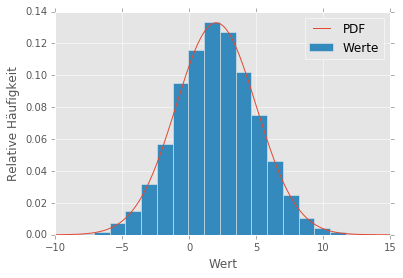

In [10]:
import scipy.stats
pdf = scipy.stats.norm(2, 3).pdf
xs = np.linspace(-10, 15, 10000)  # Erzeuge 10000 äquidistante Werte im Interval [-15, 15).
plt.plot(xs, pdf(xs), label='PDF')

plt.hist(gauss, bins=20, normed=True, label='Werte')
plt.xlabel('Wert')
plt.ylabel('Relative Häufigkeit')
plt.legend()

Das sieht doch schon mal hübsch aus. Ich denke das ist ein guter Punkt um unsere kleine Einführung zu beenden.

An dieser Stelle sei abschließend auf die [Scipy Dokumentation](http://docs.scipy.org/doc/scipy/reference/) verwiesen. Neben dem [Statistikmodul](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) gibt es dort Funktionen für, unter anderem, Integration ([`scipy.integrate`](http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)), Optimierung/Fits ([`scipy.optimize`](http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)), Interpolation ([`scipy.interpolate`](http://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)), Fouriertransformationen ([`scipy.fftpack`](http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html)) und viele mehr.

## Weiterführendes Material

 * [Pandas](http://pandas.pydata.org/pandas-docs/stable/) ein mächtiges Werkzeug für die Analyse tabellarischer Daten im Stile von Data Frames in R
 * [Uncertainties](https://pythonhosted.org/uncertainties/) Bibliothek für das Rechnen mit Unsicherheiten
 * [SimPy](http://docs.sympy.org/latest/index.html) Bibliothek für symbolisches Rechnen